# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


## Пропуски

Сохраним данные о наличии пропусков в отдельные признаки и заполним их:

In [5]:
df['cuisine_style_isNAN'] = pd.isna(df['Cuisine Style']).astype('uint8')
df['number_of_reviews_isNAN'] = pd.isna(df['Number of Reviews']).astype('uint8')

df['Cuisine Style']=df['Cuisine Style'].fillna("")
df = df.fillna(0)

**URL_TA, ID_TA** - идентификаторы данных и ссылки, которые не несут никакой информации для будущей модели, поэтому можем их убрать. **Reviews** - мог бы стать полезным, но для этого нужно применить сложные методы для обработки текста, поэтому также удалим.

In [6]:
df=df.drop(columns=['URL_TA','ID_TA', 'Reviews'])
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,cuisine_style_isNAN,number_of_reviews_isNAN
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,0,0
1,id_1535,Stockholm,,1537.0,4.0,0,10.0,1,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,0,0
3,id_3456,Berlin,,3458.0,5.0,0,3.0,1,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,0,0


Столбец город также не получится использовать для обучения, так как он не числовой, но можно извлечь полезную информацию. Заменим средним значением рейтинга по городу.


In [7]:
def calc_mean_score(row):
    return df[df['City']==row['City']]['Rating'].mean()

In [8]:
df['city_mean']=df.apply(calc_mean_score, axis=1)

**Price Range** - категориальный признак, можем разбить на столбцы **low_price** для `$`, **mid_price** для `$$-$$$`, **high_price** для `$$$$`

In [9]:
df['Price Range'].value_counts()
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,cuisine_style_isNAN,number_of_reviews_isNAN,city_mean
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,0,0,3.942414
1,id_1535,Stockholm,,1537.0,4.0,0,10.0,1,0,3.870122
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,0,0,3.955098
3,id_3456,Berlin,,3458.0,5.0,0,3.0,1,0,4.124594
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,0,0,4.047032


In [10]:
df=pd.get_dummies(df, columns=['Price Range'])
df.columns=['Restaurant_id','city', 'cuisine_style','ranking','Rating', 'review_numbers', 'cuisine_style_isNAN', 'number_of_reviews_isNAN', 'city_mean','low_price','mid_price','high_price','no_price']
df

,Restaurant_id,city,cuisine_style,ranking,Rating,review_numbers,cuisine_style_isNAN,number_of_reviews_isNAN,city_mean,low_price,mid_price,high_price,no_price
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,0,0,3.942414,0,0,1,0
1,id_1535,Stockholm,,1537.0,4.0,10.0,1,0,3.870122,1,0,0,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,0,0,3.955098,0,0,0,1
3,id_3456,Berlin,,3458.0,5.0,3.0,1,0,4.124594,1,0,0,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,0,0,4.047032,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,79.0,0,0,3.824895,0,0,1,0
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,542.0,0,0,3.942414,0,0,1,0
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,4.0,0,0,3.870122,1,0,0,0
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,70.0,0,0,4.089409,0,0,1,0


**cuisine_style** - столбец со списком предлагаемых в ресторане видов кухни. Вряд ли мы сможем обнаружить зависимость того что кухню одной страны оценивают лучше чем кухню другой. Люди разные и вкусы тоже разные. Такое влияние лучше избежать. А вот какие лучше оценивают те, которые специализируются на чем-то одном или которые предлагают максимум разнообразия поможет оценить новый признак **count_cuisine**. Посчитаем сколько видов кухонь предлагается в каждом из ресторанов. 

In [11]:
df.cuisine_style.value_counts().head(30)

                                                                   9283
['Italian']                                                        1032
['French']                                                          805
['Spanish']                                                         695
['French', 'European']                                              405
['Cafe']                                                            403
['Pizza']                                                           371
['Italian', 'Pizza']                                                343
['European', 'Portuguese']                                          342
['Chinese']                                                         328
['Mediterranean']                                                   256
['Bar', 'Pub']                                                      255
['Mediterranean', 'Spanish']                                        236
['Indian']                                                      

In [12]:
count = []
for i in df.cuisine_style.values:
    if i == 0:
        count.append(1)
    else:
        count.append(len(i.split(',')))

df['count_cuisine'] = count
df.head()

,Restaurant_id,city,cuisine_style,ranking,Rating,review_numbers,cuisine_style_isNAN,number_of_reviews_isNAN,city_mean,low_price,mid_price,high_price,no_price,count_cuisine
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,0,0,3.942414,0,0,1,0,3
1,id_1535,Stockholm,,1537.0,4.0,10.0,1,0,3.870122,1,0,0,0,1
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,0,0,3.955098,0,0,0,1,7
3,id_3456,Berlin,,3458.0,5.0,3.0,1,0,4.124594,1,0,0,0,1
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,0,0,4.047032,0,0,1,0,3


In [13]:
df.head()

,Restaurant_id,city,cuisine_style,ranking,Rating,review_numbers,cuisine_style_isNAN,number_of_reviews_isNAN,city_mean,low_price,mid_price,high_price,no_price,count_cuisine
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,0,0,3.942414,0,0,1,0,3
1,id_1535,Stockholm,,1537.0,4.0,10.0,1,0,3.870122,1,0,0,0,1
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,0,0,3.955098,0,0,0,1,7
3,id_3456,Berlin,,3458.0,5.0,3.0,1,0,4.124594,1,0,0,0,1
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,0,0,4.047032,0,0,1,0,3


**ranking** - обозначает место, которое ресторан занимает среди ресторанов города. Чтобы получить пользу от этого признака, необходимо сделать поправку, так как лучший ресторан в одном городе может быть хуже среднего ресторана в другом городе

In [14]:
df['rest_counts'] = df.city.apply(lambda x: df.city.value_counts()[x])

In [15]:
df['relative_rank'] = df.ranking / df.rest_counts

Уберем столбец ranking так как мы его заменили на relative_rank, а также вспомогательный столбец rest_counts. И оставшиеся нечисловые стобцы, которые мы также заменили 'city','restaurant_id','cuisine_style'.

In [16]:
df=df.drop(columns=['ranking','rest_counts','city','cuisine_style'])

In [17]:
df

,Restaurant_id,Rating,review_numbers,cuisine_style_isNAN,number_of_reviews_isNAN,city_mean,low_price,mid_price,high_price,no_price,count_cuisine,relative_rank
0,id_5569,3.5,194.0,0,0,3.942414,0,0,1,0,3,1.137431
1,id_1535,4.0,10.0,1,0,3.870122,1,0,0,0,1,1.874390
2,id_352,4.5,688.0,0,0,3.955098,0,0,0,1,7,0.061317
3,id_3456,5.0,3.0,1,0,4.124594,1,0,0,0,1,1.604640
4,id_615,4.0,84.0,0,0,4.047032,0,0,1,0,3,0.695409
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,4.5,79.0,0,0,3.824895,0,0,1,0,4,0.234412
39996,id_6340,3.5,542.0,0,0,3.942414,0,0,1,0,5,1.294874
39997,id_1649,4.5,4.0,0,0,3.870122,1,0,0,0,2,2.014634
39998,id_640,4.0,70.0,0,0,4.089409,0,0,1,0,5,0.881706


По таблице корреляции видно, что сильнокоррелирующих столбцов нет, можно оставить все

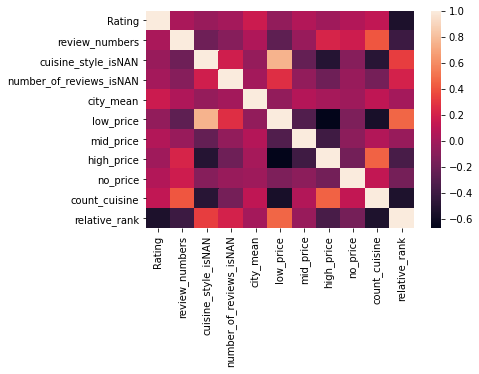

In [18]:
sns.heatmap(df.corr())

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [19]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']

In [20]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [21]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [22]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [23]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [24]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21380749999999998


# Submission для Kaggle

In [25]:
test_data = df.drop(['Rating','Restaurant_id'], axis=1)

In [26]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [27]:
predict_submission = regr.predict(test_data[:10000])
predict_submission = np.round(predict_submission*2)/2
predict_submission

array([3.5, 4. , 4.5, ..., 4.5, 3.5, 4. ])

In [28]:
import os

outname = 'submission.csv'

outdir = './result'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)   

In [29]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv("result/submission.csv", index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.5
1,id_1,4.0
2,id_2,4.5
3,id_3,5.0
4,id_4,4.0
5,id_5,3.0
6,id_6,4.0
7,id_7,3.0
8,id_8,4.0
9,id_9,4.0
